In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

pd.read_csv('data_co2.csv', sep=' ')
co2_data = pd.read_csv('data_co2.csv', sep=' ')

{1958: 672.051428571429, 1959: 673.738248571429, 1960: 675.4731385714291, 1961: 677.2429885714291, 1962: 679.0609085714292, 1963: 680.9487485714293, 1964: 682.9152485714293, 1965: 684.9429285714293, 1966: 687.0580085714292, 1967: 689.2255285714292, 1968: 691.4411185714292, 1969: 693.7484785714292, 1970: 696.1607185714294, 1971: 698.5729585714294, 1972: 701.0463785714293, 1973: 703.6159385714293, 1974: 706.1898685714293, 1975: 708.7506885714294, 1976: 711.4557185714293, 1977: 714.2306685714293, 1978: 717.0318385714293, 1979: 719.9466285714292, 1980: 722.8177185714293, 1981: 725.6276285714292, 1982: 728.5074585714293, 1983: 731.4003985714293, 1984: 734.3938485714292, 1985: 737.4615885714293, 1986: 740.6123585714294, 1987: 743.8286785714294, 1988: 747.1498785714293, 1989: 750.5322585714293, 1990: 753.9321185714293, 1991: 757.4062685714293, 1992: 760.7842785714294, 1993: 764.1535485714294, 1994: 767.5708885714295, 1995: 771.0362985714294, 1996: 774.5497785714293, 1997: 778.0938485714294, 1

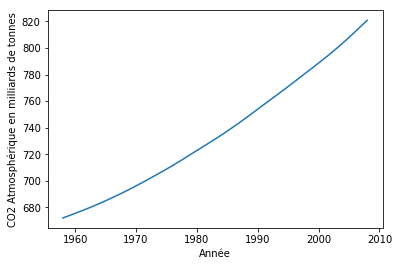

In [3]:
Emissions = [float(j.replace(",", ".")) for j in [i for i in co2_data['Em']]]
Util_terres = [float(j.replace(",", ".")) for j in [i for i in co2_data['Util_terres']]]
List_Y = [int(i) for i in co2_data['Année']]


def calcul_co2_y(Le,Lu,a_at,a_y,N):
    """list[float]*list[float]*float*int*float->dict[int:float]
     Etant donnés deux listes (une des émissions d'énergies fossiles par année et une autre des utilisations des terres par année), 
     mais aussi de la quantité de CO2 atmosphérique pour une année initiale et d'un pourcentage d'absorption liée à l'absorption 
     du CO2 par la nature, la fonction renvoie un dictionnaire dont les clés sont les années et les valeurs associés sont le taux 
     de CO2 atmosphérique à ces années respectivements en milliards de tonnes
     Hyp : len(Le)=len(Lu) """
    
    CO2_at = a_at 
    D = {a_y:a_at}
    
    for i in range(0,len(Le)):
        CO2_at = CO2_at + Le[i] + Lu[i] - N*(Le[i] + Lu[i])
        D[a_y+i+1] = CO2_at
       
    List_CO2 = [i for i in D.values()]
    
    plt.plot([a_y]+List_Y , List_CO2)
    plt.xlabel('Année')
    plt.ylabel('CO2 Atmosphérique en milliards de tonnes')
    
    return D

print(calcul_co2_y(Emissions,Util_terres,672.051428571429,1958,56.3/100))



In [10]:
def predict_Em(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_Em():
    
    X = List_Y
    Y = Emissions
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Emissions')
    plt.xlabel('Année')
    plt.ylabel('Emissions de CO2 en Mt')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict_Em(slope, intercept, X), c='r')
    plt.show()
    
def Em(year):
    
    X = List_Y
    Y = Emissions
        
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    
    return slope*year + intercept


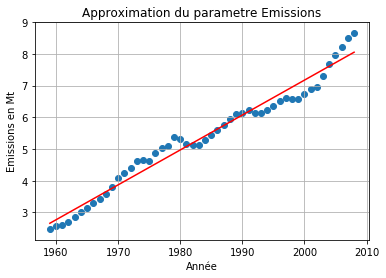

In [11]:
graph_Em()

In [13]:
def predict_Ut(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_Ut():
    
    X = List_Y
    Y = Util_terres
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Utilisations Terres')
    plt.xlabel('Année')
    plt.ylabel('Utilisations Terres en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict_Ut(slope, intercept, X), c='r')
    plt.show()
    
def Ut(year):
    
    X = List_Y
    Y = Util_terres
        
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    
    return slope*year + intercept

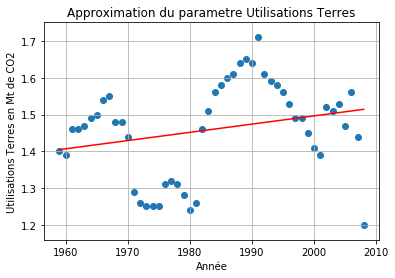

In [14]:
graph_Ut()

In [60]:
a_y = 1958

def predict_Ut_bis(slope, intercept, annee_final, pourcentage, annee_chute, X):
    
    annee_pre = 0
    list_valeur= []
    slope_pre = slope
    
    if pourcentage == 0:
        return slope*np.asarray(X) + intercept
    else:
        for i in range(a_y, annee_final):
            if not i < annee_chute:
                list_valeur = list_valeur.append(slope*np.asarray(X) + intercept)
            else:
                slope_pre = slope_pre - (slope_pre*pourcentage/100)
                list_valeur = list_valeur.append((slope_pre)*np.asarray(X) + intercept)
                
    return list_valeur

def annee(annee_final):
    
    annee = list_Y
    
    if annee_final > list_Y[len(list_Y)-1]:
        for i in range(list_Y[len(list_Y)-1], annee_final):
            annee = annee[len(annee)-1].append(annee[len(annee)-1]+1)
            
    return annee
            

In [61]:
def graph_Ut_bis(annee_final, pourcentage, annee_chute):
    
    X = List_Y
    Y = Util_terres
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Utilisations Terres')
    plt.xlabel('Année')
    plt.ylabel('Utilisations Terres en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(annee(annee_final, predict_Ut_bis(slope, intercept, annee_final, pourcentage, annee_chute, X), c='r'))
    plt.show()

AttributeError: 'NoneType' object has no attribute 'append'

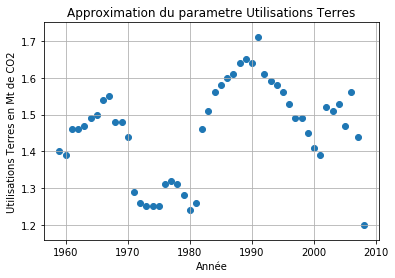

In [62]:
graph_Ut_bis(2100, 10, 2030)

In [42]:
test = [3]


In [43]:
test.append(4)

In [49]:
[3] + [5]


[3, 5]

In [50]:
test


[3, 4]

In [57]:
test + 5

TypeError: can only concatenate list (not "int") to list

In [58]:
test.append(5)

In [59]:
test

[3, 4, 5]